In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('cleaned_ebay_deals.csv')

df.head()

,timestamp,title,price,hotness_status,item_url,original_price,shipping,discount_percentage
0,3/19/2025 19:14,Microsoft Xbox Series S,299.00,Almost gone,https://www.ebay.com/itm/266190900217?_trkparm...,299.00,Shipping info unavailable,0
1,3/19/2025 19:14,Apple iPhone 15 Pro 256gb ( Unlocked) US E-Sim...,674.99,Almost gone,https://www.ebay.com/itm/166613095133?_trkparm...,674.99,Shipping info unavailable,0
2,3/19/2025 19:14,Google Pixel 8 Pro 128GB Factory Unlocked - Ex...,383.99,Almost gone,https://www.ebay.com/itm/226348022590?_trkparm...,383.99,Shipping info unavailable,0
3,3/19/2025 19:14,Seagate EXOS X16 ST14000NM005G 14TB 256MB 7200...,147.99,NaN,https://www.ebay.com/itm/176825170520?_trkparm...,147.99,Shipping info unavailable,0
4,3/19/2025 19:14,Apple iPhone 14 Pro 128GB Unlocked - Excellent,446.95,Almost gone,https://www.ebay.com/itm/405469724990?_trkparm...,446.95,Shipping info unavailable,0


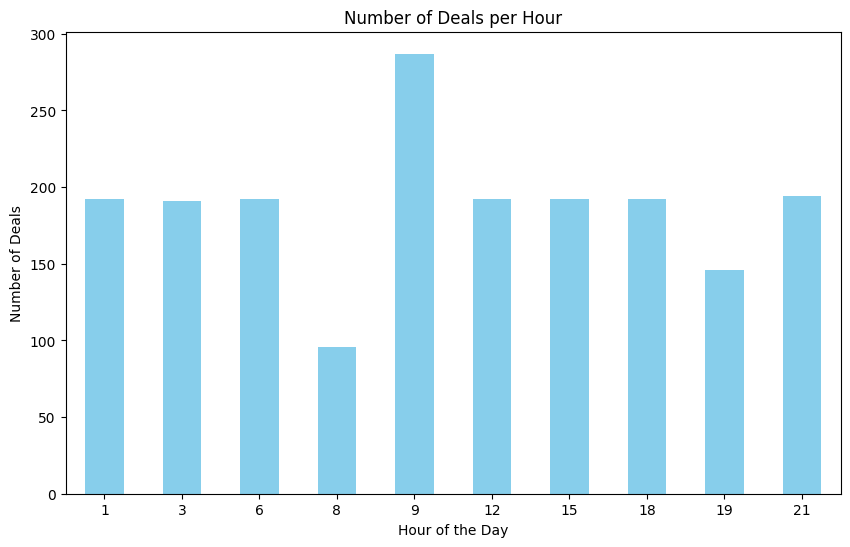

In [2]:

df['timestamp'] = pd.to_datetime(df['timestamp'])


df = df.sort_values(by='timestamp')


df['hour'] = df['timestamp'].dt.hour


deals_per_hour = df.groupby('hour').size()


plt.figure(figsize=(10, 6))
deals_per_hour.plot(kind='bar', color='skyblue')
plt.title('Number of Deals per Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Deals')
plt.xticks(rotation=0)
plt.show()

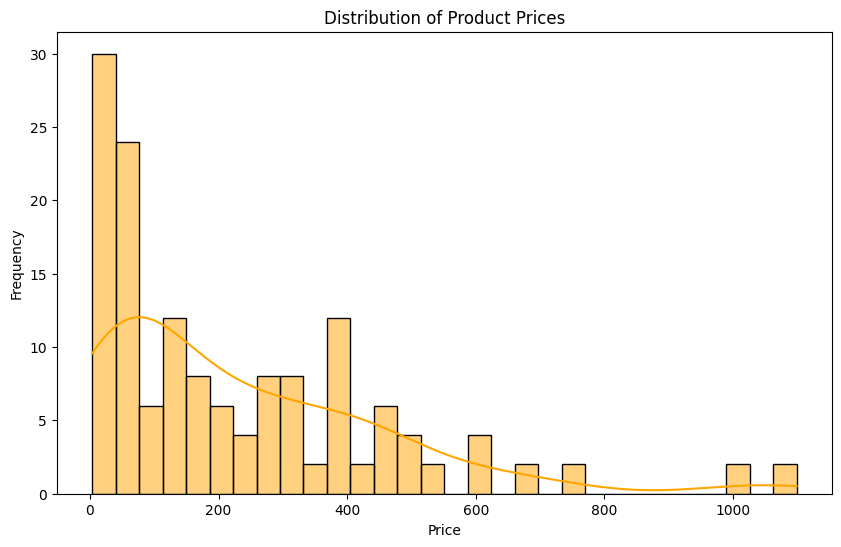

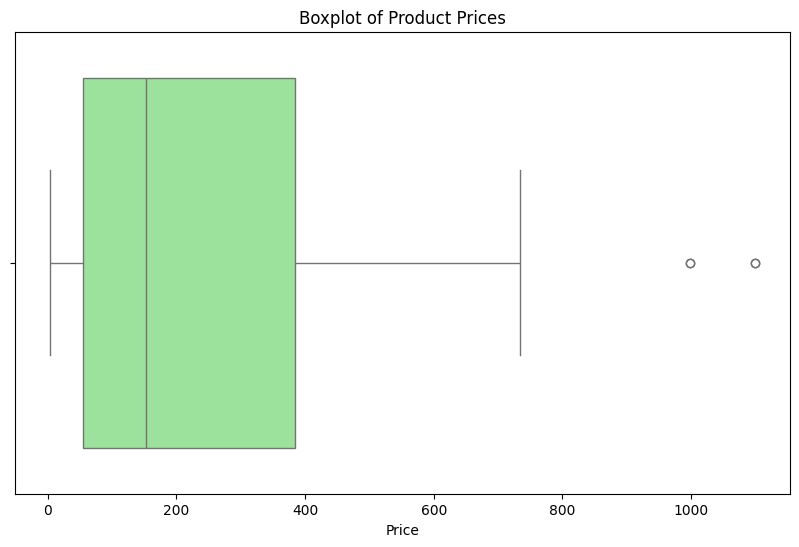

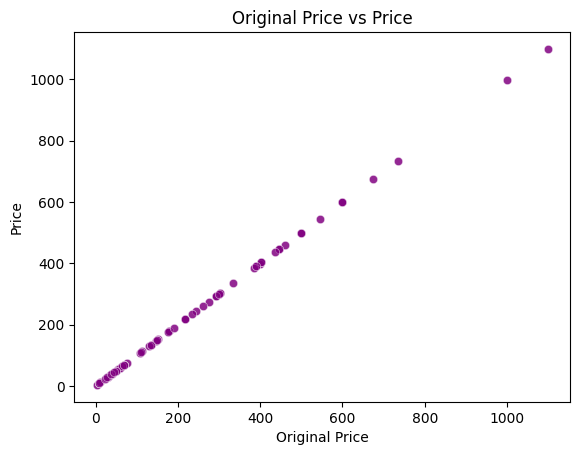

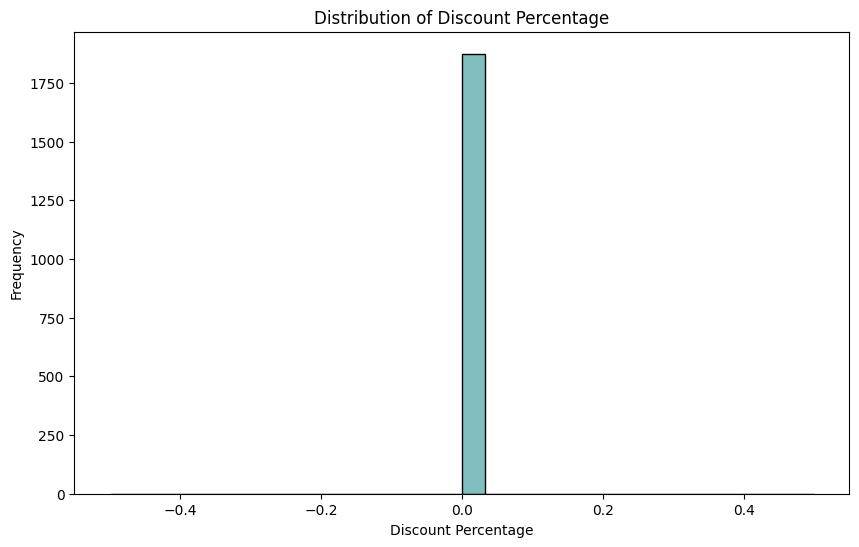

In [3]:

plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=30, kde=True, color='orange')
plt.title('Distribution of Product Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


plt.figure(figsize=(10, 6))
sns.boxplot(x=df['price'], color='lightgreen')
plt.title('Boxplot of Product Prices')
plt.xlabel('Price')
plt.show()


sns.scatterplot(x=df['original_price'], y=df['price'], alpha=0.6, color='purple')
plt.title('Original Price vs Price')
plt.xlabel('Original Price')
plt.ylabel('Price')
plt.show()


plt.figure(figsize=(10, 6))
sns.histplot(df['discount_percentage'], bins=30, kde=True, color='teal')
plt.title('Distribution of Discount Percentage')
plt.xlabel('Discount Percentage')
plt.ylabel('Frequency')
plt.show()

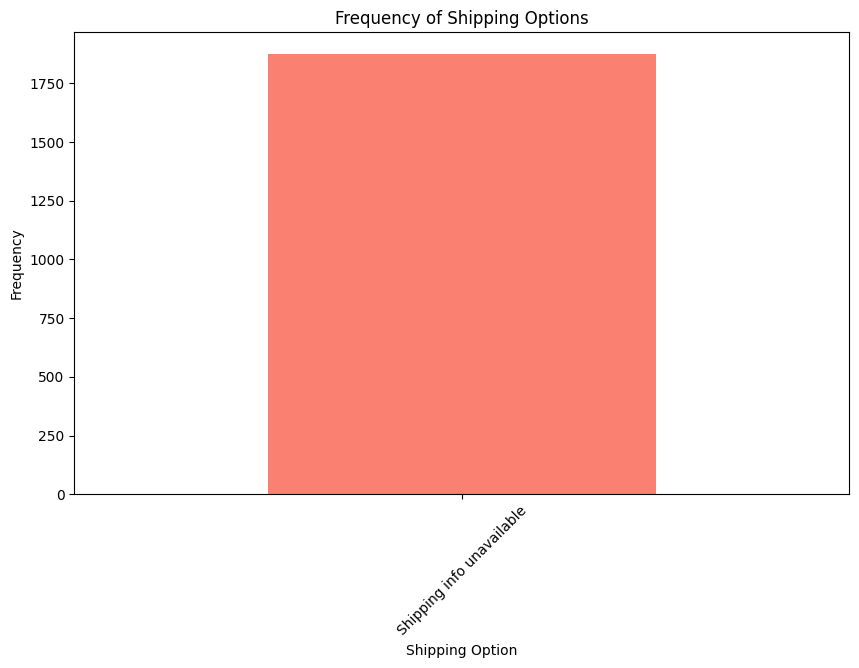

In [4]:

shipping_counts = df['shipping'].value_counts()


plt.figure(figsize=(10, 6))
shipping_counts.plot(kind='bar', color='salmon')
plt.title('Frequency of Shipping Options')
plt.xlabel('Shipping Option')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_19320\3369556909.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Keyword', y='Count', data=keyword_df, palette='viridis')


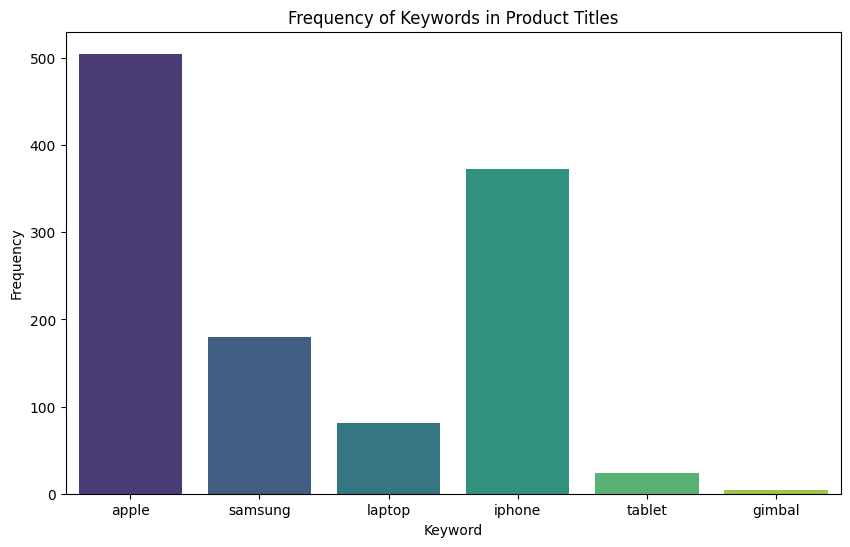

In [5]:

keywords = ['apple', 'samsung', 'laptop', 'iphone', 'tablet', 'gimbal']


keyword_counts = {}
for keyword in keywords:
    keyword_counts[keyword] = df['title'].str.contains(keyword, case=False).sum()


keyword_df = pd.DataFrame(list(keyword_counts.items()), columns=['Keyword', 'Count'])

plt.figure(figsize=(10, 6))
sns.barplot(x='Keyword', y='Count', data=keyword_df, palette='viridis')
plt.title('Frequency of Keywords in Product Titles')
plt.xlabel('Keyword')
plt.ylabel('Frequency')
plt.show()

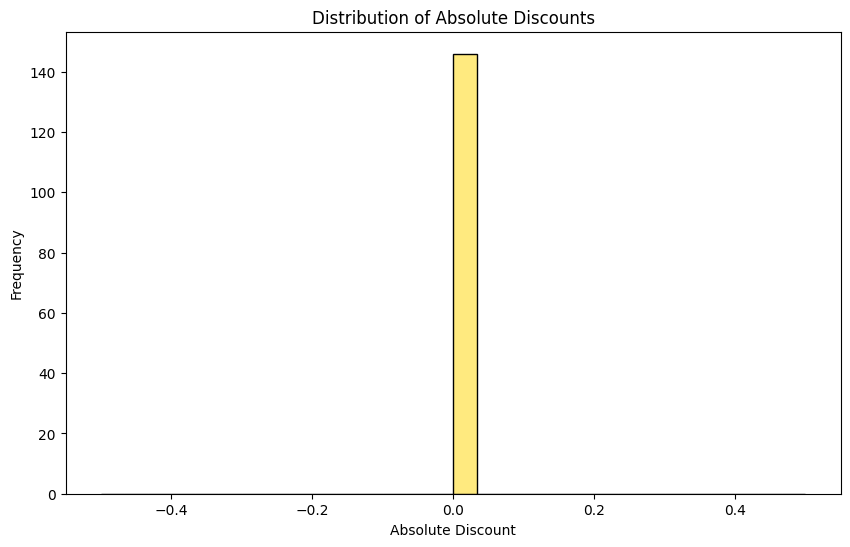

In [6]:

df['absolute_discount'] = df['original_price'] - df['price']

plt.figure(figsize=(10, 6))
sns.histplot(df['absolute_discount'], bins=30, kde=True, color='gold')
plt.title('Distribution of Absolute Discounts')
plt.xlabel('Absolute Discount')
plt.ylabel('Frequency')
plt.show()

In [7]:

sorted_df = df.sort_values(by='discount_percentage', ascending=False)


top_5_discounts = sorted_df.head(5)
top_5_discounts[['title', 'price', 'original_price', 'discount_percentage']]

,title,price,original_price,discount_percentage
1873,"Acer PM161Q 15.6"" Monitor LCD Display 60Hz 192...",NaN,NaN,0
0,Microsoft Xbox Series S,299.0,299.0,0
1816,"Apple Macbook Pro M1 Max 16"" 2021 10-Core CPU ...",NaN,NaN,0
1817,"Microsoft Surface Laptop 7 Copilot+PC 13.8"" Sn...",NaN,NaN,0
1818,VIZIO V20x-J8B-RB V-Series 2.0 Compact Sound Bar,NaN,NaN,0
